In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress

#import csv
cta_df = pd.read_csv("CTA_Ridership.csv")
cta_df

,service_date,day_type,bus,rail_boardings,total_rides
0,01/01/2001,U,297192,126455,423647
1,01/02/2001,W,780827,501952,1282779
2,01/03/2001,W,824923,536432,1361355
3,01/04/2001,W,870021,550011,1420032
4,01/05/2001,W,890426,557917,1448343
...,...,...,...,...,...
7331,11/26/2020,U,119470,56839,176309
7332,11/27/2020,W,221878,106692,328570
7333,11/28/2020,A,198860,97141,296001
7334,11/29/2020,U,145682,76276,221958


In [2]:
#grab 2019 dates
first_df = cta_df[6636:6879]
second_df = cta_df[6953:7074]

#merge dataframes
full_2019 = pd.merge(first_df, second_df, how='outer')

#change service_date column to string for easier manipulation
full_2019 = full_2019.astype({'service_date':'string'})
#split service_date column to isolate months
full_2019.service_date = full_2019.service_date.str.split('/', expand=True)
#recast service_date as int
full_2019 = full_2019.astype({'service_date':'int64'})
#bin and group by month
month_numbers = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
month_names = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
full_2019['Month'] = pd.cut(full_2019['service_date'], month_numbers, labels=month_names)
month_grouped_2019 = full_2019.groupby(['Month']).sum()
#drop service_date column, rename columns
month_grouped_2019 = month_grouped_2019.drop(columns=['service_date'])
month_grouped_2019 = month_grouped_2019.rename(columns={'bus': 'Bus Boardings', 
                                                        'rail_boardings': 'Rail Boardings',
                                                       'total_rides': 'Total Rides'})
month_grouped_2019

,Bus Boardings,Rail Boardings,Total Rides
Month,,,
January,17453868,16068845,33522713
February,18278676,16356941,34635617
March,20267147,18019169,38286316
April,19936880,18385649,38322529
May,21144868,19206970,40351838
June,19794294,18783743,38578037
July,19903917,19103898,39007815
August,19940708,19408958,39349666
September,20478069,18821186,39299255


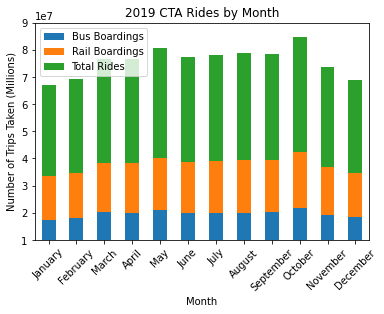

In [4]:
#make a bar graph of 2019 CTA travel
month_grouped_2019.plot.bar(stacked=True, rot=45)
plt.ylim(10000000, 90000000)
plt.title("2019 CTA Rides by Month")
plt.xlabel("Month")
plt.ylabel("Number of Trips Taken (Millions)")
fig = plt.gcf()
fig.savefig("2019plot.png");

In [3]:
#grab 2020 dates
third_df = cta_df[6879:6952]
fourth_df = cta_df[7075:]

#merge dataframes
full_2020 = pd.merge(third_df, fourth_df, how='outer')

#change service_date column to string for easier manipulation
full_2020 = full_2020.astype({'service_date':'string'})
#split service_date column to isolate months
full_2020.service_date = full_2020.service_date.str.split('/', expand=True)
#recast service_date as int
full_2020 = full_2020.astype({'service_date':'int64'})
full_2020['Month'] = pd.cut(full_2020['service_date'], month_numbers, labels=month_names)
#drop service_date column, empty December column, and rename columns
month_grouped_2020 = full_2020.groupby(['Month']).sum()
month_grouped_2020 = month_grouped_2020.drop(columns=['service_date'])
month_grouped_2020 = month_grouped_2020.drop(['December'])
month_grouped_2020 = month_grouped_2020.rename(columns={'bus': 'Bus Boardings', 
                                                        'rail_boardings': 'Rail Boardings',
                                                       'total_rides': 'Total Rides'})
month_grouped_2020

,Bus Boardings,Rail Boardings,Total Rides
Month,,,
January,19482387,17181153,36663540
February,19030115,16298769,35328884
March,12992731,9558623,22551354
April,5851652,2266610,8118262
May,6822849,2235078,9057927
June,7331691,2955135,10286826
July,8608427,4255061,12863488
August,8540935,4260558,12801493
September,8593214,4556719,13149933


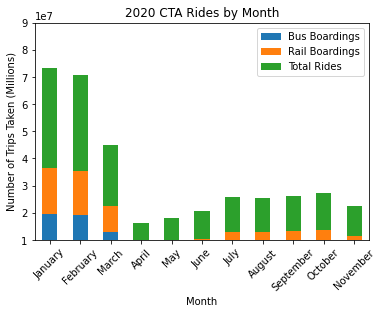

In [12]:
#make a bar graph of 2019 CTA travel
month_grouped_2020.plot.bar(stacked=True, rot=45)
plt.ylim(10000000, 90000000)
plt.title("2020 CTA Rides by Month")
plt.xlabel("Month")
plt.ylabel("Number of Trips Taken (Millions)")
fig2 = plt.gcf()
fig2.savefig("2020plot.png");

In [6]:
fifth_df = cta_df[6879:6952]
sixth_df = cta_df[7075:]
#merge dataframes
daily_2020 = pd.merge(fifth_df, sixth_df, how='outer')

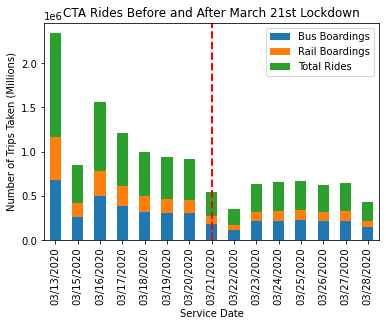

In [28]:
that_week = daily_2020[72:87]
that_week = that_week.rename(columns = {'service_date': 'Service Date'})
that_week = that_week.set_index(['Service Date'])
that_week = that_week.rename(columns = {'bus': 'Bus Boardings',
                                        'rail_boardings' : 'Rail Boardings',
                                       'total_rides': 'Total Rides'})
fig3, ax = plt.subplots()
that_week.plot.bar(stacked=True, ax=ax)
plt.title('CTA Rides Before and After March 21st Lockdown')
plt.ylabel('Number of Trips Taken (Millions)')
#code from:
#https://stackoverflow.com/questions/61606615/pandas-dataframe-how-to-add-a-vertical-line-with-label-to-a-bar-plot-when-your
ax.axvline(that_week.index.searchsorted('03/21/2020'), color="red", linestyle="--", lw=2, label="Lockdown");
fig3.savefig("lockdownplot.png")